In [1]:
import pandas as pd 
df=pd.read_csv('Used_Bikes.csv')
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [2]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

<AxesSubplot: xlabel='owner', ylabel='count'>

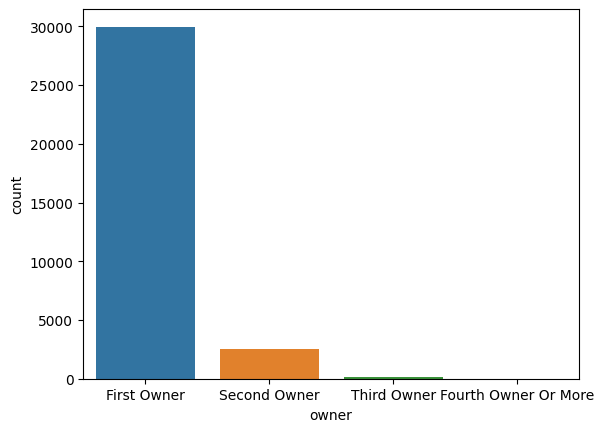

In [5]:
import seaborn as sns
sns.countplot(data=df,x='owner')

In [6]:
# for drop the element in a column
for x in df.index:
  if df.loc[x, "owner"]=='Fourth Owner Or More':
    df.drop(x, inplace = True)

In [7]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object)

In [8]:
for x in df.index:
  if df.loc[x,"owner"]=='Third Owner':
    df.drop(x,inplace=True)

In [9]:
df['owner'].unique()

array(['First Owner', 'Second Owner'], dtype=object)

<AxesSubplot: xlabel='owner', ylabel='count'>

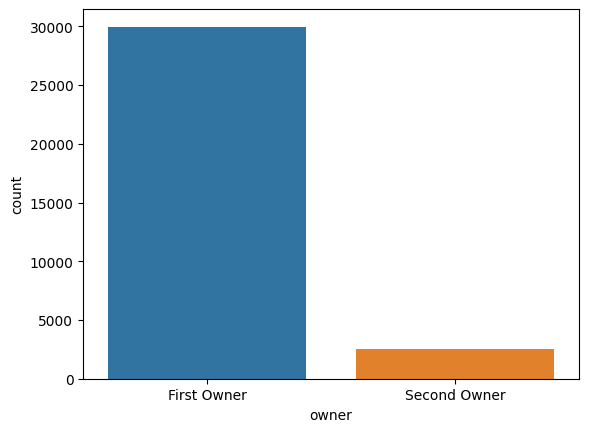

In [10]:
sns.countplot(x='owner',data=df)

In [11]:
df=df.drop(['bike_name','city','brand'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32528 entries, 0 to 32647
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       32528 non-null  float64
 1   kms_driven  32528 non-null  float64
 2   owner       32528 non-null  object 
 3   age         32528 non-null  float64
 4   power       32528 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.5+ MB


In [13]:
d2=pd.get_dummies(df['owner'],drop_first=True)

In [14]:
df1=pd.concat([d2,df],axis=1)
df=df1

In [15]:
df.head()

,Second Owner,price,kms_driven,owner,age,power
0,0,35000.0,17654.0,First Owner,3.0,110.0
1,0,119900.0,11000.0,First Owner,4.0,350.0
2,0,600000.0,110.0,First Owner,8.0,675.0
3,0,65000.0,16329.0,First Owner,4.0,180.0
4,0,80000.0,10000.0,First Owner,3.0,150.0


In [16]:
df=df.drop(['owner'],axis=1)

In [17]:
df.head()

,Second Owner,price,kms_driven,age,power
0,0,35000.0,17654.0,3.0,110.0
1,0,119900.0,11000.0,4.0,350.0
2,0,600000.0,110.0,8.0,675.0
3,0,65000.0,16329.0,4.0,180.0
4,0,80000.0,10000.0,3.0,150.0


In [18]:
df['Second_Owner']=df['Second Owner']

In [19]:
df.head()

,Second Owner,price,kms_driven,age,power,Second_Owner
0,0,35000.0,17654.0,3.0,110.0,0
1,0,119900.0,11000.0,4.0,350.0,0
2,0,600000.0,110.0,8.0,675.0,0
3,0,65000.0,16329.0,4.0,180.0,0
4,0,80000.0,10000.0,3.0,150.0,0


In [20]:
df=df.drop(['Second Owner'],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32528 entries, 0 to 32647
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         32528 non-null  float64
 1   kms_driven    32528 non-null  float64
 2   age           32528 non-null  float64
 3   power         32528 non-null  float64
 4   Second_Owner  32528 non-null  uint8  
dtypes: float64(4), uint8(1)
memory usage: 2.3 MB


In [22]:
x=df.drop(['price'],axis=1)
y=df['price']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression
modele1=LinearRegression()
modele1.fit(x_train,y_train)

LinearRegression()

In [26]:
print("accuracy is ",modele1.score(x_test,y_test)*100)

accuracy is  74.42452161800222


In [27]:
from sklearn.ensemble import RandomForestRegressor
modele=RandomForestRegressor()
modele.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
print("accuracy is ",modele.score(x_test,y_test)*100)

accuracy is  95.00297661862878


In [31]:
#R-squared scores
import numpy as np
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(modele, x_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.9425987181572794


# The R-squared or coefficient of determination is 0.9425 on average for 3-fold cross validation , it means that predictor is only able to predict 94% of the variance in the target variable which is contributed by independent variables.